In [4]:
from keras.preprocessing import image
from keras import applications
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
classes = [1, 2, 3, 4, 5]

In [3]:
base_model = applications.MobileNetV2(weights='imagenet', include_top=False,)

/home/mgalalen/.local/lib/python3.6/site-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(5, activation='softmax')(x)

In [13]:
model = Model(inputs=base_model.input, outputs=predictions)

In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
traingen = image.ImageDataGenerator(rescale=1/255, 
                                    horizontal_flip=True, 
                                    vertical_flip=True,
                                    rotation_range=180,
                                   zoom_range=[1, 0.5],)
train_data = traingen.flow_from_directory('datasets/HandSet/train/',target_size=(224,224), batch_size=32)

Found 550 images belonging to 5 classes.


In [16]:
testgen = image.ImageDataGenerator(rescale=1/255)
test_data = traingen.flow_from_directory('datasets/HandSet/test/',target_size=(224,224), batch_size=16)

Found 180 images belonging to 5 classes.


In [17]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model on the new data for a few epochs
H = model.fit_generator(train_data, epochs=10, 
                        steps_per_epoch=int(500//32), 
                        validation_data=test_data, 
                        validation_steps=int(180//16),)


Epoch 1/10
15/15 [==============================] - 72s 5s/step - loss: 5.4467 - acc: 0.2396 - val_loss: 1.5511 - val_acc: 0.3625
Epoch 2/10
15/15 [==============================] - 65s 4s/step - loss: 1.5269 - acc: 0.3787 - val_loss: 1.7290 - val_acc: 0.3375
Epoch 3/10
15/15 [==============================] - 70s 5s/step - loss: 1.5478 - acc: 0.4099 - val_loss: 1.2412 - val_acc: 0.5000
Epoch 4/10
15/15 [==============================] - 71s 5s/step - loss: 1.4091 - acc: 0.4584 - val_loss: 1.5909 - val_acc: 0.3500
Epoch 5/10
15/15 [==============================] - 71s 5s/step - loss: 1.3498 - acc: 0.4726 - val_loss: 1.2161 - val_acc: 0.5147
Epoch 6/10
15/15 [==============================] - 75s 5s/step - loss: 1.2632 - acc: 0.4832 - val_loss: 2.5321 - val_acc: 0.2750
Epoch 7/10
15/15 [==============================] - 94s 6s/step - loss: 1.1728 - acc: 0.5167 - val_loss: 1.5773 - val_acc: 0.3750
Epoch 8/10
15/15 [==============================] - 91s 6s/step - loss: 1.2774 - acc: 0.49

In [18]:
print(len(base_model.layers))
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)



155
0 input_1
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5

In [19]:
for layer in model.layers[:80]:
    layer.trainable = False
for layer in model.layers[80:]:
    layer.trainable = True


In [23]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
HA = model.fit_generator(train_data, epochs=5, 
                    steps_per_epoch=int(500//32),
                   validation_data=test_data,
                    validation_steps=int(180//16),)

Epoch 1/5
15/15 [==============================] - 126s 8s/step - loss: 0.3753 - acc: 0.8641 - val_loss: 8.4395 - val_acc: 0.3088
Epoch 2/5
15/15 [==============================] - 121s 8s/step - loss: 0.3513 - acc: 0.8850 - val_loss: 5.4596 - val_acc: 0.4500
Epoch 3/5
15/15 [==============================] - 117s 8s/step - loss: 0.4055 - acc: 0.8598 - val_loss: 4.9521 - val_acc: 0.4265
Epoch 4/5
15/15 [==============================] - 124s 8s/step - loss: 0.4089 - acc: 0.8521 - val_loss: 4.3931 - val_acc: 0.5000
Epoch 5/5
15/15 [==============================] - 113s 8s/step - loss: 0.3717 - acc: 0.8763 - val_loss: 3.4553 - val_acc: 0.5441


In [24]:
def preprocess(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return applications.mobilenetv2.preprocess_input(img)

SyntaxError: invalid syntax (<ipython-input-24-76bcbb12266a>, line 1)

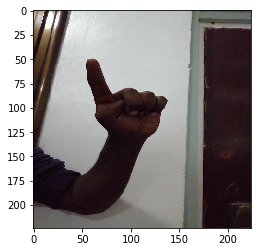

In [72]:
img = image.load_img('datasets/data/test/1/thumb0009.jpg', target_size=(224, 224))
plt.imshow(img)

In [74]:
pred = model.predict(img); pred

array([[9.8704058e-01, 3.6409115e-03, 9.1143874e-03, 1.9389705e-04,
        1.0287669e-05]], dtype=float32)

In [75]:
classes[np.argmax(pred)]

1

In [ ]:
model.save('newmodel.h5')